In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path
import mysql.connector
import datetime
import math
from scipy import stats
from scipy.stats import f_oneway
from sklearn.preprocessing import MinMaxScaler
import mysql.connector
from scipy.stats import ttest_ind
import csv

In [2]:
username = 'root'
user_password = 'Sadegh74'
db_name = 'superstore'

In [3]:
cnx = mysql.connector.connect(
    user=username,
    password=user_password,
    host='localhost',
    database=db_name
)

In [4]:
query = "SELECT * FROM order_detail;"
df = pd.read_sql(query, con=cnx)
df.head()

,Row ID,Order ID,Product ID,Sales,Quantity,Discount,Profit,Shipping Cost
0,1,MX-2014-143658,OFF-LA-10002782,13.08,3,0.0,4.56,1.033
1,2,MX-2012-155047,FUR-FU-10004015,252.16,8,0.0,90.72,13.449
2,3,MX-2012-155047,FUR-BO-10002352,193.28,2,0.0,54.08,9.627
3,4,MX-2012-155047,OFF-BI-10004428,35.44,4,0.0,4.96,1.371
4,5,MX-2012-155047,OFF-AR-10004594,71.60,2,0.0,11.44,3.787


In [5]:
w_dis = df[df['Discount'] != 0]
wo_dis = df[df['Discount'] == 0]

In [6]:
t_statistic, p_value = stats.ttest_ind(w_dis['Quantity'], wo_dis['Quantity'])

alpha = 0.05

if p_value < alpha:
    print("Reject the null hypothesis.")
else:
    print("Fail to reject the null hypothesis.")

Reject the null hypothesis.


In [7]:
output = {}
output['No. Discounted'] = len(w_dis)
output['No. Without Discount'] = len(wo_dis)
output['hypothesis'] = 'The average quantity of discounted orders is same to the average quantity of non-discounted orders.'
output['t_statistic'] = t_statistic
output['p_value'] = p_value
output['alpha'] = alpha
output['result'] = 'Reject the Hypothesis' if p_value < alpha else 'Fail to Reject the Hypothesis'
output = pd.DataFrame(output, index=[0])
output

,No. Discounted,No. Without Discount,hypothesis,t_statistic,p_value,alpha,result
0,21567,28103,The average quantity of discounted orders is s...,8.392667,4.875845e-17,0.05,Reject the Hypothesis


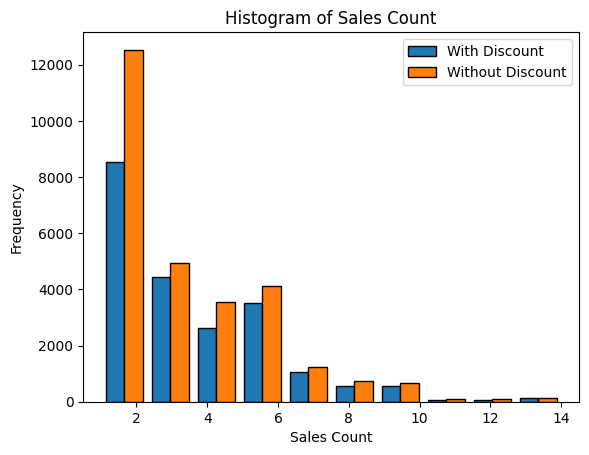

In [8]:
plt.hist([w_dis['Quantity'], wo_dis['Quantity']], edgecolor='black', label=['With Discount', 'Without Discount'])
plt.xlabel('Sales Count')
plt.ylabel('Frequency')
plt.title('Histogram of Sales Count')
plt.legend()
plt.savefig('Histogram.png')
plt.show()

In [9]:
groups = [df[df['Discount'] == discount]['Quantity'] for discount in df['Discount'].unique()]

f_statistic, p_value = stats.f_oneway(*groups)

print("F-Statistic:", f_statistic)
print("P-Value:", p_value)
alpha = 0.05

if p_value < alpha:
    print("Reject the null hypothesis.")
else:
    print("Fail to reject the null hypothesis.")

F-Statistic: 26.295425880281698
P-Value: 1.677405040885998e-126
Reject the null hypothesis.


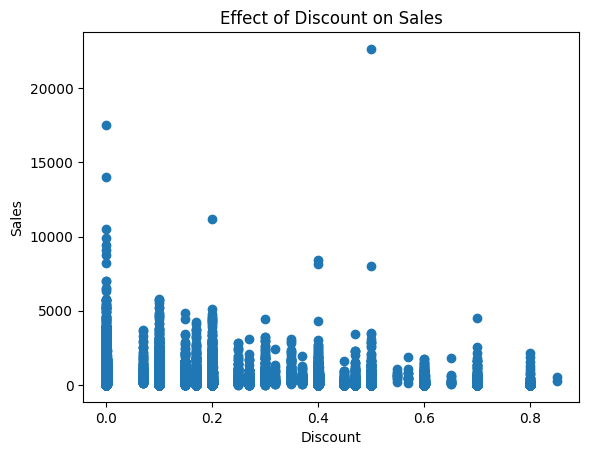

Correlation Coefficient: -0.08596851624989942


In [10]:
plt.scatter(df['Discount'], df['Sales'])
plt.xlabel('Discount')
plt.ylabel('Sales')
plt.title('Effect of Discount on Sales')
plt.show()

correlation = df['Discount'].corr(df['Sales'])
print("Correlation Coefficient:", correlation)